## Random Forests

Here we will use Random Forests to attemp image classification

In [234]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import cross_validation
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler  
from sklearn import model_selection

In [3]:
df = pd.read_csv("train.csv")
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df.ix[:,1:],df.ix[:,0] , test_size=0.2, random_state=1)
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [17]:
from sklearn import tree
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_estimators=1)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
def plotter(train_scores,test_scores,train_sizes,xlabel,ylabel,title,filename):
    #plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Testing score")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title(title)
    plt.savefig(filename)
    plt.show()

In [20]:
clf.score(X_test,y_test)

0.79559523809523813

In [33]:
from sklearn.learning_curve import validation_curve
prange = [1,100,250,500,750,1000]
#train_scores_val, test_scores_val = validation_curve(clf, X_train,y_train, param_name="n_estimators", param_range = prange, cv = 5,scoring="accuracy")

/usr/local/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [46]:
import pickle
#pickle.dump(train_scores_val, open( "train_scores_val.p", "wb" ))
#pickle.dump(test_scores_val, open( "test_scores_val.p", "wb" ))

train_scores_val = pickle.load( open( "train_scores_val.p", "rb" ) )
test_scores_val = pickle.load( open( "test_scores_val.p", "rb" ) )

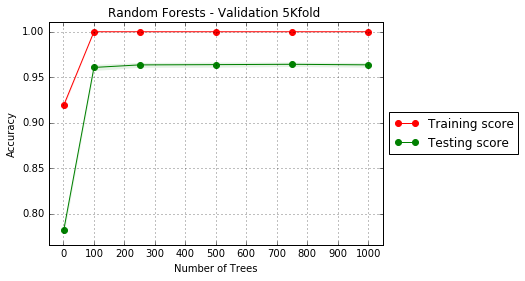

In [49]:
plotter(train_scores_val,test_scores_val,prange,"Number of Trees","Accuracy","Random Forests - Validation 5Kfold ","RandomForests_Val")

As we can see from the plot there is not much of a benefit from having over 100 trees and because past 100 trees the training time increases greatly, we will stick with 100 for the rest of the tuning process.

In [52]:
from sklearn.learning_curve import learning_curve
clf = ensemble.RandomForestClassifier(n_estimators=100)

train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, train_sizes = np.linspace(.1,.99, num = 10), cv=5)

In [71]:
pickle.dump(test_scores, open( "test_scores_learn.p", "wb" ))
pickle.dump(train_scores, open( "train_scores_learn.p", "wb" ))

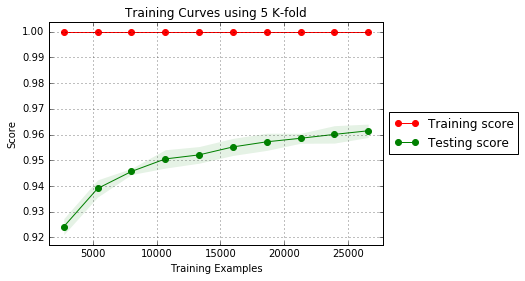

In [53]:
plotter(train_scores,test_scores,train_sizes,"Training Examples", "Score", "Training Curves using 5 K-fold", "RandomForests_Learning_Curves");

As we saw with the Neural Network, we could probably improve the performance if we were able to gain more samples. We will now look to keep tuning the Random Forests by adjusting the ____

In [68]:
import time
start_time = time.time()
clf = ensemble.RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score = True)
#Unlimmited --- 4.14583897591 seconds ---
#1 Processor --- 20.5791888237 seconds ---

clf.fit(X_train,y_train)
print("--- %s seconds ---" % (time.time() - start_time))



--- 8.01108717918 seconds ---


In [77]:
param_grid = [{'min_samples_leaf': [1,20,50,100,250,500,1000,2000,3000], 'max_features': ["auto","sqrt","log2", None]}]
clf_grid = sklearn.model_selection.GridSearchCV(clf,param_grid, cv = 5)

In [78]:
clf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'max_features': ['auto', 'sqrt', 'log2', None], 'min_samples_leaf': [20, 50, 100, 250, 500, 1000, 2000, 3000]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [176]:
clf_grid.grid_scores_ = pickle.load( open( "clf_grid_scores_.p", "rb" ) )



Here is an example of what the output of the Grid Scores looks like

In [232]:
clf_grid.grid_scores_[1:5]

[mean: 0.93801, std: 0.00222, params: {'max_features': 'auto', 'min_samples_leaf': 20},
 mean: 0.92220, std: 0.00364, params: {'max_features': 'auto', 'min_samples_leaf': 50},
 mean: 0.90533, std: 0.00216, params: {'max_features': 'auto', 'min_samples_leaf': 100},
 mean: 0.87500, std: 0.00418, params: {'max_features': 'auto', 'min_samples_leaf': 250}]

In [178]:
mean_list = list()
cv_list = list()
maxfeat_list = list()
min_leaf_list = list()
for i in range(0,len(clf_grid.grid_scores_)):
    mean_list.append(clf_grid.grid_scores_[i][1])
    cv_list.append(clf_grid.grid_scores_[i][2])
    maxfeat_list.append(clf_grid.grid_scores_[i][0]['max_features'])
    min_leaf_list.append(clf_grid.grid_scores_[i][0]['min_samples_leaf'])

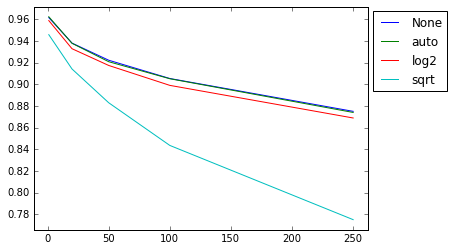

In [180]:
for i in range(0,len(mean_list),9):
    plt.plot(min_leaf_list[i:i+5],mean_list[i:i+5])
plt.legend(np.unique(maxfeat_list),loc=10, bbox_to_anchor=(1.125, 0.80))

It shows that the minimum samples per leaf performs much better at a lower number (1) and using "auto" to determine maximum features. This was very similar to None (which I believe this is suggesting that we need a very complex model with n maximum features). 

One thing that is surprising is that sklearn says we should have the same results with "Auto" and "sqrt" which we are not seeing from this plot.

In [181]:
#from sklearn.ensemble import ExtraTreesClassifier
#clf_extra = ExtraTreesClassifier(n_estimators=100, max_depth=None,min_samples_split=1, random_state=0)
#clf_extra.fit(X_train,y_train)
#clf.score(X_test,y_test)

In [203]:
clf_final = ensemble.RandomForestClassifier(n_estimators=100, max_features= "auto",min_samples_leaf = 1, n_jobs=-1 )



In [186]:
scaler = StandardScaler()  
X_final = scaler.fit_transform(df.ix[:,1:])  
y_final = df.ix[:,0]


In [208]:
clf_final.fit(X_final,y_final)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [206]:
df_test = pd.read_csv("test.csv")
df_test = scaler.transform(df_test)

In [209]:
prediction = clf_final.predict(df_test)

In [219]:
pred_df = pd.DataFrame(prediction)

In [220]:
pd.DataFrame.to_csv(pred_df,"output.csv")

Results gave a 0.96600 